In [73]:
import tensorflow as tf


In [74]:
#Importación de todas las librerías

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [75]:
#Descarga de los datos (el dataga set de kagle gatos y perros )
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [76]:
# Asignación de variables con las rutas definidas para entrenamiento del modelo 
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [77]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directorio con las fotos de Gatos
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directorio con las fotos de Perros
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directorio con la validación de las fotos de gatos
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory con la validación de las fotos de perros.

In [78]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
#agregé un print para controlar los outputs de los datos
print( 'total de img de gatos para el entrenamiento:',num_cats_tr)
print('total de img de perros para entrenamiento:', num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

print('total img de validacion de gatos:', num_cats_val)
print('total img de validacion de perros:', num_dogs_val)

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("Total de img para el entrenamiento:", total_train)
print("Total de img para el entrenamiento:", total_val)

('total de img de gatos para el entrenamiento:', 1000)
('total de img de perros para entrenamiento:', 1000)
('total img de validacion de gatos:', 500)
('total img de validacion de perros:', 500)
('Total de img para el entrenamiento:', 2000)
('Total de img para el entrenamiento:', 1000)


In [79]:
# Establecer variables para el preprocesamiento de los datos. y número de épocas del entrenamiento. 
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [80]:
# Para la preparación de los datos utilizaremos la clase ImageDataGenerator de Keras.procesarlas en tensores.
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [81]:
# Para poder procesar las imágenes es necesario reescalarlas.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 2000 images belonging to 2 classes.


In [82]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [83]:
sample_training_images, _ = next(train_data_gen)

In [84]:
# Esta función grafica imgs en forma de grilla de 1 por 5 

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

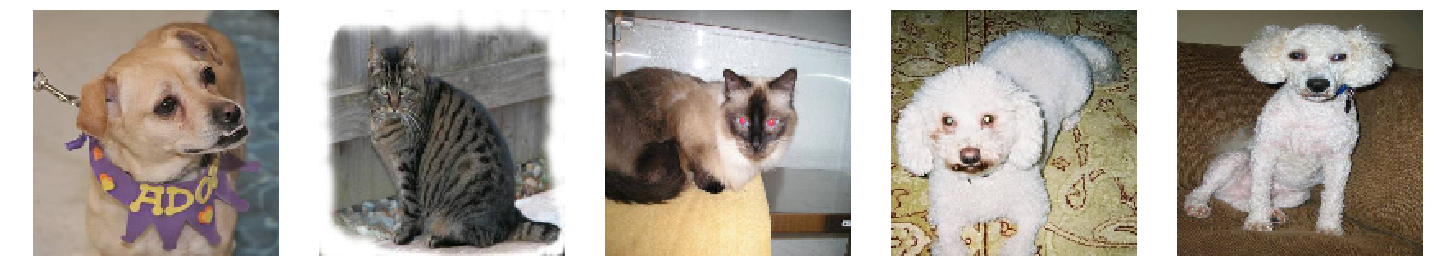

In [85]:
plotImages(sample_training_images[:5])

In [86]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [87]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

In [89]:
#Entrenando el Modelo: utilizamos la clase ImageDataGenerator para entrenar el Modelo

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)



Epoch 1/15
15/15 [==============================] - 29s 2s/step - loss: 1.0524 - acc: 0.5085 - val_loss: 0.6921 - val_acc: 0.4911
Epoch 2/15
15/15 [==============================] - 29s 2s/step - loss: 0.6903 - acc: 0.5036 - val_loss: 0.6847 - val_acc: 0.4911
Epoch 3/15
15/15 [==============================] - 26s 2s/step - loss: 0.6836 - acc: 0.5198 - val_loss: 0.6855 - val_acc: 0.4911
Epoch 4/15
15/15 [==============================] - 27s 2s/step - loss: 0.6637 - acc: 0.5326 - val_loss: 0.6552 - val_acc: 0.5536
Epoch 5/15
15/15 [==============================] - 26s 2s/step - loss: 0.6223 - acc: 0.6316 - val_loss: 0.6270 - val_acc: 0.6462
Epoch 6/15
15/15 [==============================] - 26s 2s/step - loss: 0.5711 - acc: 0.6827 - val_loss: 0.6229 - val_acc: 0.6205
Epoch 7/15
15/15 [==============================] - 27s 2s/step - loss: 0.5302 - acc: 0.7233 - val_loss: 0.5875 - val_acc: 0.7031
Epoch 8/15
15/15 [==============================] - 27s 2s/step - loss: 0.5109 - acc: 0.74

In [90]:
# Pasamos horizontal_filp como argumento al ImageDataGenerator, lo declaramos a true
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [91]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


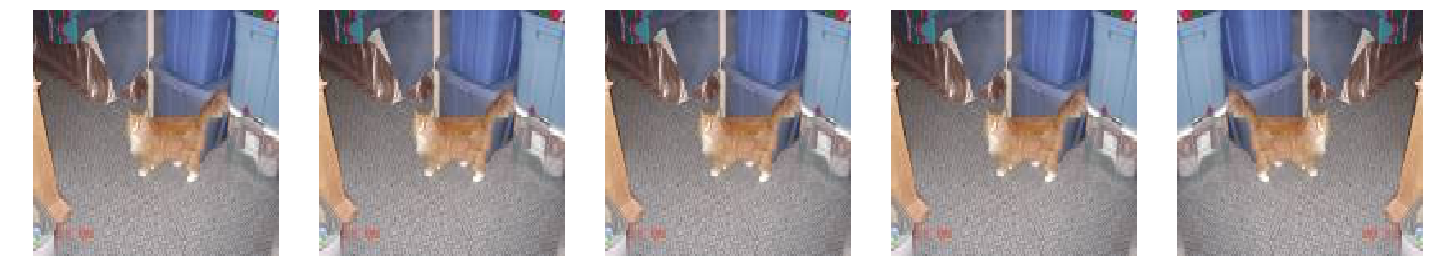

In [92]:
plotImages(augmented_images)

In [93]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

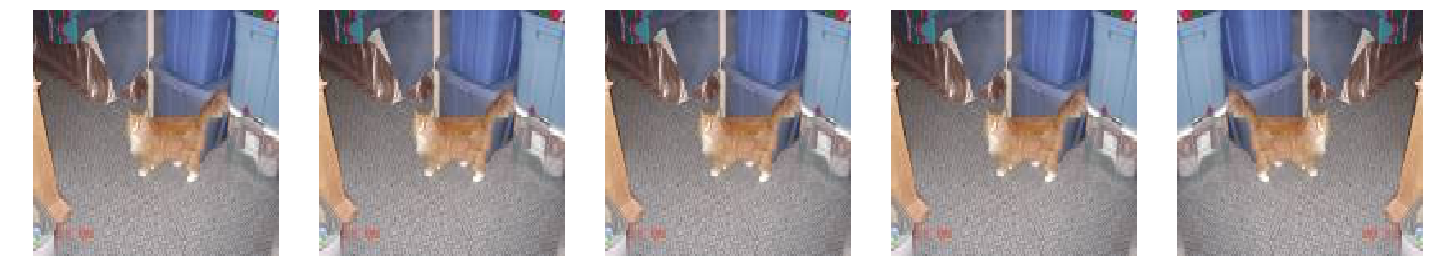

In [94]:
plotImages(augmented_images)

In [95]:
#El metodo rotation 45 rotará lasimágenes para mayor exactitud en la predicción.
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [96]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


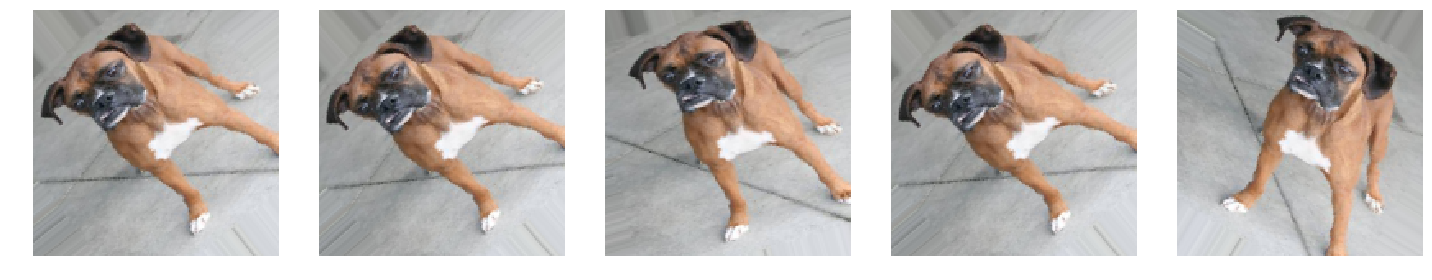

In [97]:
plotImages(augmented_images)

In [98]:
#Aplicar Zoom para aumentar el tamaño y mejorar la exactitud de predicción  zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 


In [99]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 2000 images belonging to 2 classes.


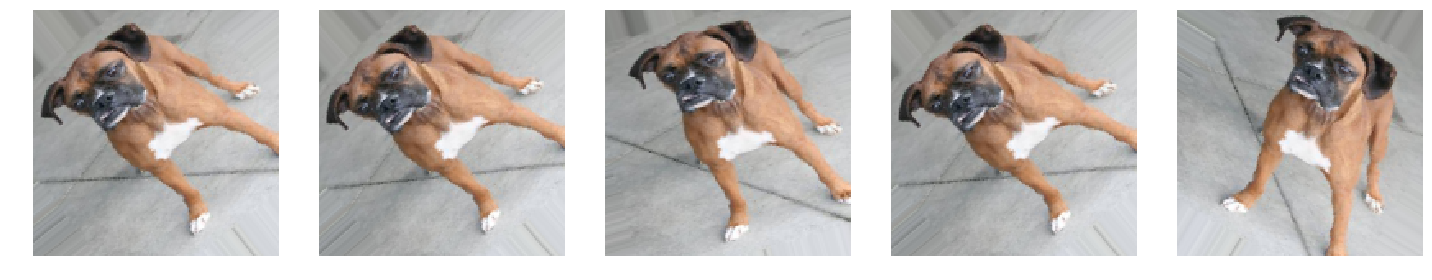

In [100]:
plotImages(augmented_images)

In [101]:
# Aqui se aplican rotación, zoll cambio de ancho y cambio de alto para mayor exactitud de predicción. 
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [102]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


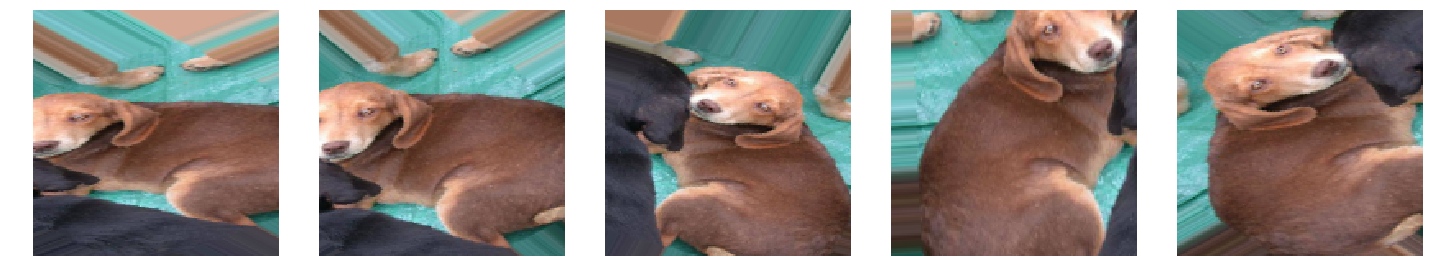

In [103]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [104]:
# Creación del Validator Data Generator.
image_gen_val = ImageDataGenerator(rescale=1./255)


In [105]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [106]:
#Drop out
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [107]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)       

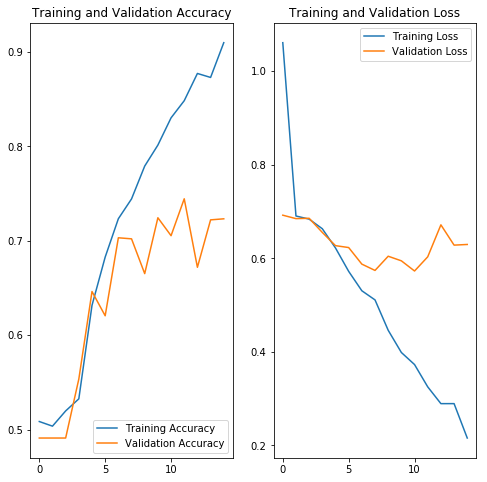

In [108]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

